# Notebook 00 · Test Your Setup
Before we dive into models, confirm that this repo can import the `cvcourse` package, talk to PyTorch, and reach the shared `data/` directory. Running this once per machine avoids chasing environment bugs during the lectures.

## Checklist
1. Import the reusable helpers from `src/cvcourse` so every later notebook can stay lean.
2. Load the default Day 1 config (`configs/day1_cnn.yaml`) to verify YAML parsing and defaults.
3. Trigger the MNIST download through our dataloader factory and visualize a mini-batch to ensure images render.
4. Run a forward/backward pass on CPU to confirm torch, optimizers, and training loops all work together.

In [5]:
from pathlib import Path
import sys
import torch

ROOT = Path.cwd().resolve()
while ROOT != ROOT.parent and not (ROOT / "pyproject.toml").exists():
    ROOT = ROOT.parent
if not (ROOT / "pyproject.toml").exists():
    raise FileNotFoundError("Could not locate repo root containing pyproject.toml")
SRC = ROOT / "src"
if str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC))

from cvcourse.config import load_config
from cvcourse.data import get_dataloaders
from cvcourse.models import SimpleCNN
from cvcourse.training import train_one_epoch, evaluate
from cvcourse.utils import get_device
from cvcourse.viz import show_batch

We resolve the repo root manually so the notebook works no matter where it is opened, then pull in the course helpers (`config`, `data`, `models`, `training`, `viz`). If import errors pop up, fix your environment before continuing.

In [6]:
config_path = ROOT / "configs" / "day1_cnn.yaml"
config = load_config(config_path)
config.extras["augment"]= False
config

ExperimentConfig(name='day1_cnn', dataset='mnist', model='simple_cnn', batch_size=64, num_workers=2, learning_rate=0.001, epochs=5, allow_gpu=False, extras={'augment': False, 'limit_train_samples': 2048, 'limit_val_samples': 512})

The config keeps experiments reproducible: batch size, learning rate, dataset choice, and small sample limits live in YAML so instructors can tweak them without editing code. If this cell errors, fix the config before moving on.

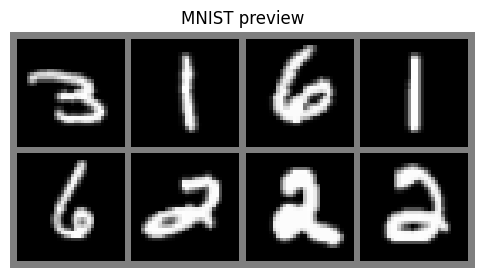

In [7]:
device = get_device(config.allow_gpu)
train_loader, val_loader = get_dataloaders(config)
images, labels = next(iter(train_loader))
show_batch(images[:8], title="MNIST preview")

This is the minimal data smoke test: we confirm GPU/CPU selection, instantiate loaders from the YAML config, and visualize a tiny batch. If you see unexpected colors/shapes, revisit the dataset download step.

In [8]:
model = SimpleCNN(num_classes=10, in_channels=images.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)
loss = train_one_epoch(model, train_loader, optimizer, device)
acc, val_loss = evaluate(model, val_loader, device)
print(f"Device: {device}")
print(f"Train loss: {loss:.3f} | Val loss: {val_loss:.3f} | Val acc: {acc*100:.1f}%")

Device: cpu
Train loss: 2.299 | Val loss: 2.285 | Val acc: 12.7%


We run a single short epoch to catch runtime issues early—shape mismatches, missing CUDA kernels, or optimizer misconfiguration will show up here. Accuracy is intentionally low; we only care that the loop executes end-to-end.

✅ If the previous cell finishes without errors, you are ready for Day 1. Keep the notebook handy if you need to re-verify drivers or reinstall dependencies.